In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('4_one_hot_encoding/carprices.csv')

In [9]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [14]:
dummies = pd.get_dummies(df['Car Model'])
dummies = dummies.replace({True: 1, False: 0})
dummies

/tmp/ipykernel_23754/2805123068.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummies = dummies.replace({True: 1, False: 0})


,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [16]:
merged = pd.concat([df,dummies],axis=1)
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [18]:
final = merged.drop(['Car Model','Mercedez Benz C class'],axis=1)

final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [54]:
X = final.drop('Sell Price($)',axis=1)
y = final['Sell Price($)']

In [57]:
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [56]:
model.fit(X,y)

LinearRegression()

In [64]:
model.predict([[59000,6,0,1]])

/home/harry/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22406.49330829])

In [69]:
model.predict([[45000,4,0,0]])

/home/harry/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [60]:
model.predict([[86000,7,0,1]])

/home/harry/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [62]:
model.score(X,y)

0.9417050937281083

## ONE HOT ENCODING

In [30]:
#one hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle



,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [43]:
X = dfle[['Car Model','Mileage','Age(yrs)']].values # this will make X a 2d array instead of a Dataframe
y = dfle['Sell Price($)']

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories=[0])
#ohe = OneHotEncoder(categorical_features=[0])


In [72]:
ohe.fit_transform(X).toarray()

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

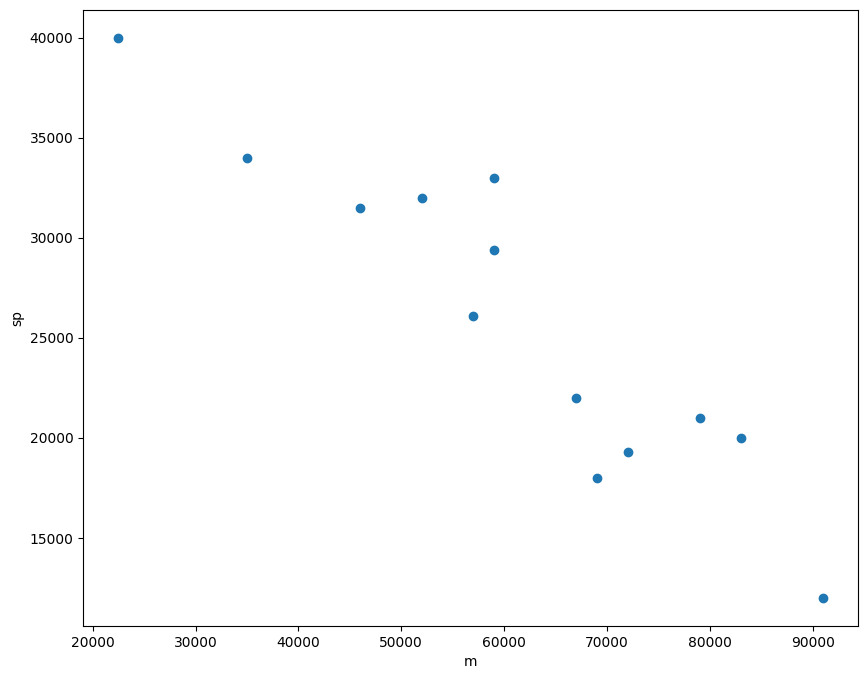

In [71]:
plt.figure(figsize=(10,8))
plt.xlabel("m")
plt.ylabel("sp")
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.show()